In [33]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fifa23-official-datasetclean-data/CLEAN_FIFA23_official_data.csv
/kaggle/input/fifa23-official-datasetclean-data/CLEAN_FIFA20_official_data.csv
/kaggle/input/fifa23-official-datasetclean-data/CLEAN_FIFA21_official_data.csv
/kaggle/input/fifa23-official-datasetclean-data/CLEAN_FIFA19_official_data.csv
/kaggle/input/fifa23-official-datasetclean-data/CLEAN_FIFA18_official_data.csv
/kaggle/input/fifa23-official-datasetclean-data/CLEAN_FIFA17_official_data.csv
/kaggle/input/fifa23-official-datasetclean-data/CLEAN_FIFA22_official_data.csv


In [34]:
import numpy as np

df = pd.read_csv('/kaggle/input/fifa23-official-datasetclean-data/CLEAN_FIFA23_official_data.csv')

In [35]:
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Position,Joined,Loaned From,Contract Valid Until,Height(cm.),Weight(lbs.),Release Clause(£),Kit Number,Best Overall Rating,Year_Joined
0,0,209658,L. Goretzka,27,https://cdn.sofifa.net/players/209/658/23_60.png,Germany,https://cdn.sofifa.net/flags/de.png,87,88,FC Bayern München,...,SUB,2018-07-01,None,2026.0,189.0,180.810,157000000.0,8.0,0.0,2018
1,1,212198,Bruno Fernandes,27,https://cdn.sofifa.net/players/212/198/23_60.png,Portugal,https://cdn.sofifa.net/flags/pt.png,86,87,Manchester United,...,LCM,2020-01-30,None,2026.0,179.0,152.145,155000000.0,8.0,0.0,2020
2,2,224334,M. Acuña,30,https://cdn.sofifa.net/players/224/334/23_60.png,Argentina,https://cdn.sofifa.net/flags/ar.png,85,85,Sevilla FC,...,LB,2020-09-14,None,2024.0,172.0,152.145,97700000.0,19.0,0.0,2020
3,3,192985,K. De Bruyne,31,https://cdn.sofifa.net/players/192/985/23_60.png,Belgium,https://cdn.sofifa.net/flags/be.png,91,91,Manchester City,...,RCM,2015-08-30,None,2025.0,181.0,154.350,198900000.0,17.0,0.0,2015
4,4,224232,N. Barella,25,https://cdn.sofifa.net/players/224/232/23_60.png,Italy,https://cdn.sofifa.net/flags/it.png,86,89,Inter,...,RCM,2020-09-01,None,2026.0,172.0,149.940,154400000.0,23.0,0.0,2020


In [36]:
world_champions = ['Brazil','France','Germany','Spain']
df_dict = {}

for champ in world_champions:
    df_dict[champ] = df[df['Nationality'] == champ]

In [37]:
df_dict['France'].head(3)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Position,Joined,Loaned From,Contract Valid Until,Height(cm.),Weight(lbs.),Release Clause(£),Kit Number,Best Overall Rating,Year_Joined
18,18,194765,A. Griezmann,31,https://cdn.sofifa.net/players/194/765/23_60.png,France,https://cdn.sofifa.net/flags/fr.png,83,83,Atlético de Madrid,...,RS,2022-08-11,FC Barcelona,2023.0,176.0,160.965,1300000.0,8.0,0.0,2022
30,30,213565,T. Lemar,26,https://cdn.sofifa.net/players/213/565/23_60.png,France,https://cdn.sofifa.net/flags/fr.png,83,86,Atlético de Madrid,...,SUB,2018-07-01,None,2023.0,171.0,138.915,99900000.0,11.0,0.0,2018
40,40,200458,L. Digne,28,https://cdn.sofifa.net/players/200/458/23_60.png,France,https://cdn.sofifa.net/flags/fr.png,82,82,Aston Villa,...,LB,2022-01-13,None,2026.0,178.0,163.170,52300000.0,27.0,0.0,2022


# Estadisticas

In [38]:
est_age = {} # Llave, [media,std,mediana]

for champ in world_champions:
    est_age[champ] = [np.mean(df_dict[champ]['Age']),np.std(df_dict[champ]['Age']),np.median(df_dict[champ]['Age'])]

In [39]:
est_age

{'Brazil': [25.41743970315399, 4.434030164595036, 25.0],
 'France': [23.44675925925926, 5.012894360344114, 22.0],
 'Germany': [22.714836223506744, 4.3311382674612275, 22.0],
 'Spain': [23.917171717171716, 4.836645477556083, 22.0]}

In [40]:
est_overall = {} # Llave, [media,std,mediana]
for champ in world_champions:
    est_overall[champ] = [np.mean(df_dict[champ]['Overall']),np.std(df_dict[champ]['Overall']),np.median(df_dict[champ]['Overall'])]

In [41]:
est_overall

{'Brazil': [70.55658627087199, 6.941983820700074, 70.0],
 'France': [66.28819444444444, 8.15767926552818, 65.0],
 'Germany': [63.50481695568401, 7.544695077365645, 62.0],
 'Spain': [67.36464646464647, 7.262005916103195, 65.0]}

# Distribuciones de Datos

In [42]:
import matplotlib.pyplot as plt

# France

**Overall**

In [43]:
print("Overall Stats")
print(f"Mean: {est_overall['France'][0]}")
print(f"Desviación Estandar: {est_overall['France'][1]}")
print(f"Median: {est_overall['France'][2]}")

Overall Stats
Mean: 66.28819444444444
Desviación Estandar: 8.15767926552818
Median: 65.0


Valores del histograma: [ 8. 25. 61. 68. 87. 88. 87. 60. 47. 59. 53. 44. 58. 47. 32. 19. 11.  5.
  2.  3.]
Bordes de los bins: [50.   52.05 54.1  56.15 58.2  60.25 62.3  64.35 66.4  68.45 70.5  72.55
 74.6  76.65 78.7  80.75 82.8  84.85 86.9  88.95 91.  ]
Objetos de las barras: <BarContainer object of 20 artists>


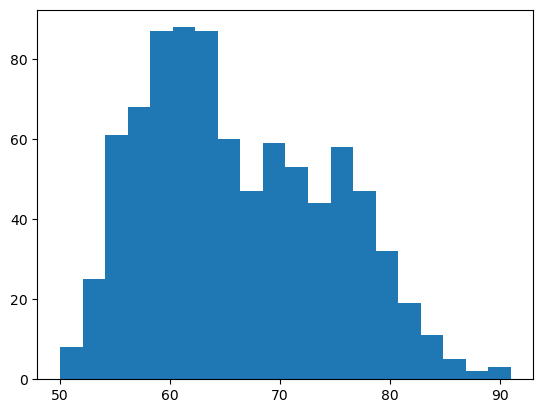

In [44]:
hist, bins, patches = plt.hist(df_dict['France']['Overall'],20)

# Imprimir los valores del histograma
print("Valores del histograma:", hist)

# Imprimir los bordes de los bins
print("Bordes de los bins:", bins)

# Imprimir los objetos de las barras
print("Objetos de las barras:", patches)

plt.show()

**Age**

In [45]:
print("Overall Stats")
print(f"Mean: {est_age['France'][0]}")
print(f"Desviación Estandar: {est_age['France'][1]}")
print(f"Median: {est_age['France'][2]}")

Overall Stats
Mean: 23.44675925925926
Desviación Estandar: 5.012894360344114
Median: 22.0


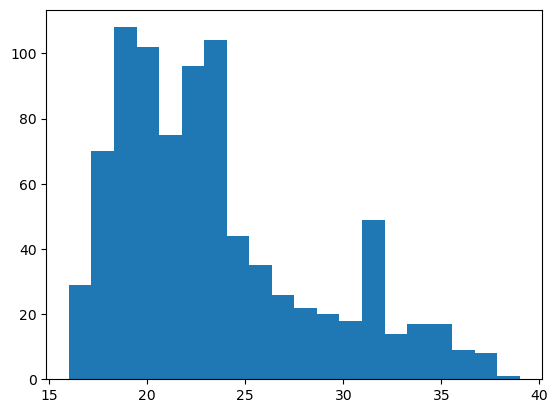

In [46]:
hist, bins, patches = plt.hist(df_dict['France']['Age'],20)
plt.show()

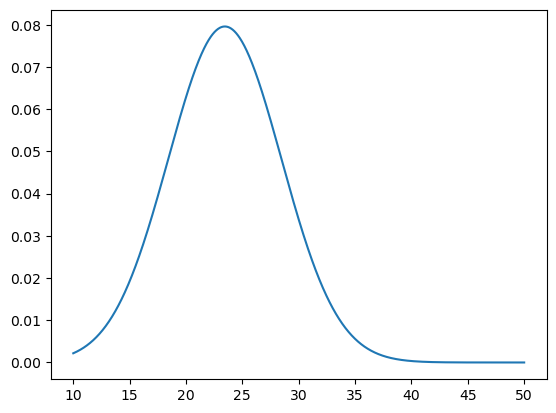

In [52]:
from scipy.stats import norm
x_axis = np.linspace(10,50,1000)
mean = est_age['France'][0]
std = est_age['France'][1]
plt.plot(x_axis, norm.pdf(x_axis,mean,std))

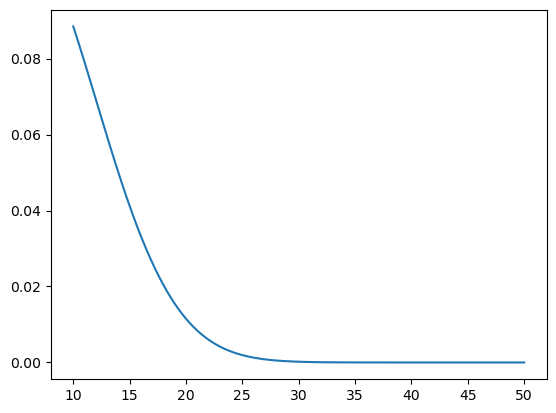

In [62]:
from scipy.stats import skewnorm 
plt.plot(x_axis,skewnorm.pdf(x_axis,mean,std,7))